# Pre-processing - Get synchronization times

This notebook create a file with times of the stimuli for a particular record.

In [1]:
# import sys
# sys.path.append('../src')
from mealib.utils import checkDirectory
from mealib.preprocessing import Sync

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook 

# experiment_name = '0007ABC032_264DR'
# experiment_name = 'MR-0262'
experiment_name = 'uerg'

mcd_file = '../data/raw_data/'+experiment_name+'/'+experiment_name+'_analog.mcd'
# mcd_file = '../data/raw_data/chirp_droga/'+experiment_name+'_analog.mcd'
output_folder = '../data/sync/'+experiment_name+'/'
checkDirectory(output_folder)

real_fps = 59.7694



# Get synchronization signal
## Matlab script

## python function

In [2]:
sync_data = Sync(experiment_name,real_fps)
sync_data.read_mcd(mcd_file)
sync_data.showEntities()

Entities in MCD file.
index:  	 label:  	 entity_type: 
0000: elec0001 0000 0000      R12 type: 2
0001: elec0001 0001 0001      L10 type: 2
0002: elec0001 0002 0002      O10 type: 2
0003: elec0001 0003 0003      P11 type: 2
0004: elec0001 0004 0004       L9 type: 2
0005: elec0001 0005 0005       N9 type: 2
0006: elec0001 0006 0006       M8 type: 2
0007: elec0001 0007 0007       R8 type: 2
0008: elec0001 0008 0008       O6 type: 2
0009: elec0001 0009 0009       N7 type: 2
0010: elec0001 0010 0010       R4 type: 2
0011: elec0001 0011 0011       P5 type: 2
0012: elec0001 0012 0012       R2 type: 2
0013: elec0001 0013 0013       M5 type: 2
0014: elec0001 0014 0014       K6 type: 2
0015: elec0001 0015 0015       I8 type: 2
0016: elec0001 0016 0016       L2 type: 2
0017: elec0001 0017 0017       M1 type: 2
0018: elec0001 0018 0018       I4 type: 2
0019: elec0001 0019 0019       K3 type: 2
0020: elec0001 0020 0020       H1 type: 2
0021: elec0001 0021 0021       I6 type: 2
0022: elec0001 0022 

In [3]:
sync_data.data.metadata_raw

{'AppName': 'MC_Rack 4.6.2.0',
 'EntityCount': 256,
 'FileComment': '',
 'FileType': 'Conf cont El,An',
 'TimeSpan': 831.1,
 'TimeStampResolution': 5e-05,
 'Time_Day': 17,
 'Time_Hour': 16,
 'Time_MilliSec': 958,
 'Time_Min': 43,
 'Time_Month': 5,
 'Time_Sec': 28,
 'Time_Year': 2018}

In [ ]:
mcd_channel = 254

sync_data.analyzer(mcd_channel)

## Read start-end file and create event list
From sync file created above we compute the difference between all frames and we only take the frames with a difference more than one frame to create a event.

In [9]:
sync_data.create_events()
sync_data.event_list.head()

,n_frames,start_event,end_event,start_next_event,event_duration,event_duration_seg,inter_event_duration,inter_event_duration_seg,protocol_name,repetition_name
0,0,0.0,154360.0,154360.0,154360.0,7.71800,0.0,0.00000,,
1,2102,154360.0,857923.0,937919.0,703563.0,35.17815,79996.0,3.99980,,
2,2100,937919.0,1640813.0,1720808.0,702894.0,35.14470,79995.0,3.99975,,
3,2100,1720808.0,2423702.0,2503698.0,702894.0,35.14470,79996.0,3.99980,,
4,2100,2503698.0,3206591.0,3286587.0,702893.0,35.14465,79996.0,3.99980,,


### Add repetition frame time  in csv file

In [ ]:
sync_data.add_repeated()
sync_data.event_list.head()

In [ ]:
event_list = sync_data.event_list
filter_frame = event_list['n_frames'] > -1
event_list[filter_frame].head()

### Check repeated


In [ ]:
mcd_channel = 2
start_point = 100000-1000
window = 20000
sync_data.plotWindow( mcd_channel, start_point, window )

## Save csv file

In [5]:
sync_data.save_analyzed(output_folder)

In [6]:
sync_data.save_events(output_folder)

In [ ]:
sync_data.close_file()

**Note:** The times in event_duration have small differences with the theoric times, it's because the theorical FPS of the projector is different to the real FPS.   

For example, projector show theoricly 60 FPS but the real FPS is 59.7523. Please ckeck it in the log file.
* 2100 images to 60 [fps] = 35 [s]
* 2100 images to 59.7523 [fps] = 35.145 [s]
The differences could be significant!

## Create separated sync files for each event


In [4]:
source_folder = '../data/sync/'+experiment_name+'/'
output_folder = '../data/sync/'+experiment_name+'/event_list/'
checkDirectory(output_folder)

sync_data.load_analyzed(source_folder)
sync_data.load_events(source_folder + 'event_list_' + sync_data.exp_name + '.csv')
sync_data.create_separated_sync(output_folder)


In [ ]:
# exp = {'MR-0117' : 0,'MR-0118' : 0,'MR-0119' : 0,'MR-0120' : 0,'MR-0121' : 0,'MR-0122' : 0,'MR-0123' : 0,'MR-0124' : 0,
#        'MR-0125' : 0,'MR-0126' : 0,'MR-0127' : 0,'MR-0128' : 0,'MR-0129' : 0,'MR-0130' : 0,'MR-0131' : 0,'MR-0133' : 0,
#        'MR-0135' : 0,'MR-0145' : 0,'MR-0146' : 0,'MR-0147' : 0,'MR-0148' : 0,'MR-0149' : 0,'MR-0174' : 0,'MR-0227' : 0,
#        'MR-0228':1,'MR-0242':0}
exp = {'MR-0261':0,'MR-0261-2':1,'MR-0262':0,'MR-0263':0,
        'MR-0263-2':0,'MR-0264':0}

for kexp in exp:
    source_folder = '../data/sync/'+kexp+'/'
    print('\n'+kexp)
    sync_data = Sync(kexp,real_fps)
    sync_data.read_mcd('../data/raw_data/'+kexp+'/'+kexp+'_analog.mcd')
    sync_data.showEntities()
    sync_data.plotWindow(2,5*60*20000,20000)

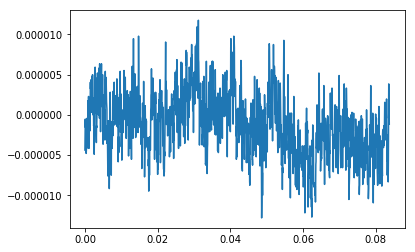

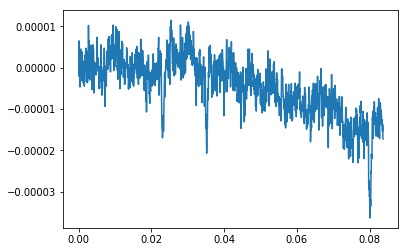

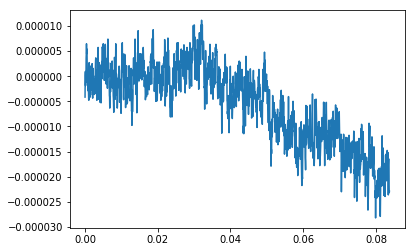

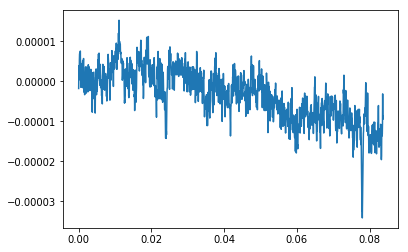

In [10]:
start_point = 154360-335
duration_points = 335*5
# for kchannel in range(252,256):
for kchannel in range(4):
    sync_data.plotWindow(kchannel,start_point,duration_points)

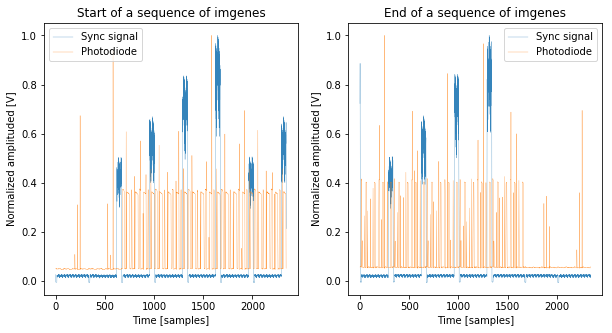

In [11]:
def getTimes(start_point, duration_points = 335*7):
    ss,nada,nada = sync_data.data.entities[254].get_data(start_point,duration_points)
    ss = ss/np.amax(ss)
    ld,nada,nada = sync_data.data.entities[253].get_data(start_point,duration_points)
    ld = ld/np.amax(ld)
    plt.plot(ss,alpha=0.9,label='Sync signal',lw=0.3)
    plt.plot(ld,alpha=0.9,label='Photodiode',lw=0.3)
    plt.xlabel('Time [samples]')
    plt.ylabel('Normalized amplituded [V]')
    plt.legend()


plt.figure(figsize=(10,5))
plt.subplot(1,2,1).set_title('Start of a sequence of imgenes')
getTimes(start_point = 154360-335*2)
plt.subplot(1,2,2).set_title('End of a sequence of imgenes')
getTimes(start_point = 857923-335*5)
# plt.savefig('../figures/Photodiode_record.png')

In [ ]:
import pyMCStream as mc
pd_data = b'/home/cesar/exp/MEA-analysis/data/raw_data/test/test_analog.mcd'
data = mc.open_stream(pd_data,b'anlg0001')



In [ ]:
data.shape

In [ ]:
data, time, dur = sync_data.get_raw_data(131)

In [ ]:
data.shape
plt.figure()
plt.plot(data[154360:857923])